In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [2]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

feature_names = [
    "Crime Rate",
    "Zoned Land Proportion",
    "Business Proportion",
    "River Proximity",
    "Nitric Oxides Concentration",
    "Average Rooms",
    "Age of Units",
    "Distance to Employment Centers",
    "Radial Highway Accessibility",
    "Property Tax",
    "Pupil-Teacher Ratio",
    "Proportion of Black Residents",
    "Lower Status Percentage"
]

# Create a DataFrame from the training set with meaningful column names
df_original = pd.DataFrame(X_train, columns=feature_names)

# Assuming you have a DataFrame named df_original
print("Data Types of Features in the Boston Housing Dataset:")
for column in df_original.columns:
    print(f"{column}: {df_original[column].dtype}")

"""
# Display the original features in the dataset
print("Original Features in the Boston Housing Dataset:")
for feature in df_original.columns:
    print("-", feature)
  """  



Data Types of Features in the Boston Housing Dataset:
Crime Rate: float64
Zoned Land Proportion: float64
Business Proportion: float64
River Proximity: float64
Nitric Oxides Concentration: float64
Average Rooms: float64
Age of Units: float64
Distance to Employment Centers: float64
Radial Highway Accessibility: float64
Property Tax: float64
Pupil-Teacher Ratio: float64
Proportion of Black Residents: float64
Lower Status Percentage: float64


'\n# Display the original features in the dataset\nprint("Original Features in the Boston Housing Dataset:")\nfor feature in df_original.columns:\n    print("-", feature)\n  '

In [ ]:
# Create a DataFrame from the training set with meaningful column names
df_original = pd.DataFrame(X_train, columns=feature_names)

# Display the DataFrame in a tabular form
display(df_original.head())

,Crime Rate,Zoned Land Proportion,Business Proportion,River Proximity,Nitric Oxides Concentration,Average Rooms,Age of Units,Distance to Employment Centers,Radial Highway Accessibility,Property Tax,Pupil-Teacher Ratio,Proportion of Black Residents,Lower Status Percentage
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
    
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])
print("\n")
print("Test features: ", X_test[0])
print("\n")
print("Test target: ", y_test[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


Test features:  [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]


Test target:  7.2


In [ ]:
boston_housing.load_data()

In [5]:
boston_features = {
    "Average Number of Rooms": 5,
    "Crime Rate":1,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_train_2d = X_train[:, boston_features["Crime Rate"]]
print(X_train_2d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]


(404,)
(404,)


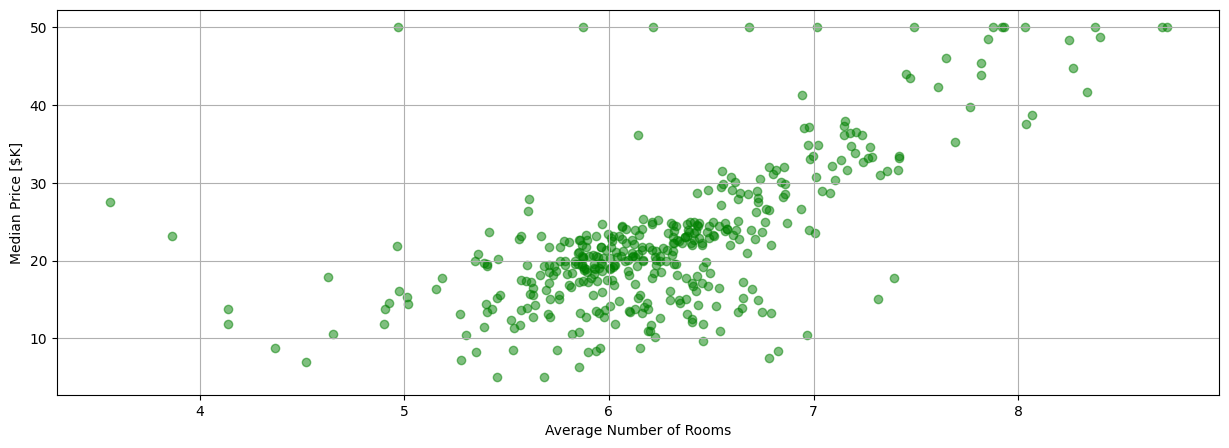

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

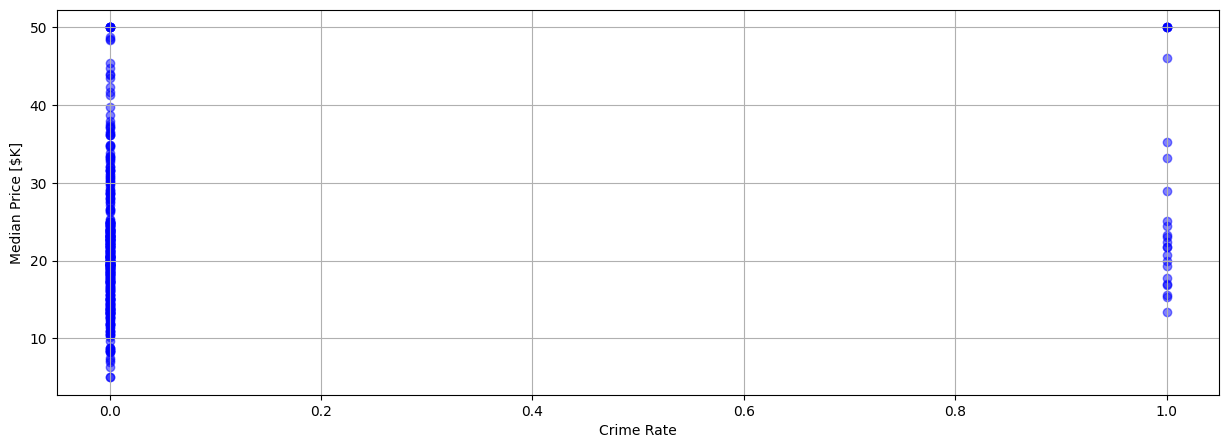

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel("Crime Rate")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_2d[:], y_train, color="blue", alpha=0.5)

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [20]:
history = model.fit(
    #X_train_1d, 
    X_train_2d,
    y_train, 
    batch_size=16, 
    epochs=101, 
    validation_split=0.3,
)

Epoch 1/101
18/18 [==============================] - 0s 11ms/step - loss: 5376.4736 - val_loss: 5597.9565
Epoch 2/101
18/18 [==============================] - 0s 5ms/step - loss: 5062.1255 - val_loss: 5337.5723
Epoch 3/101
18/18 [==============================] - 0s 5ms/step - loss: 4807.4531 - val_loss: 5068.0063
Epoch 4/101
18/18 [==============================] - 0s 6ms/step - loss: 4564.5190 - val_loss: 4815.2266
Epoch 5/101
18/18 [==============================] - 0s 5ms/step - loss: 4328.9785 - val_loss: 4581.9170
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 4093.2957 - val_loss: 4327.1948
Epoch 7/101
18/18 [==============================] - 0s 7ms/step - loss: 3854.5093 - val_loss: 4080.2341
Epoch 8/101
18/18 [==============================] - 0s 5ms/step - loss: 3635.3154 - val_loss: 3862.3975
Epoch 9/101
18/18 [==============================] - 0s 5ms/step - loss: 3424.2659 - val_loss: 3648.1406
Epoch 10/101
18/18 [==============================] - 

In [21]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

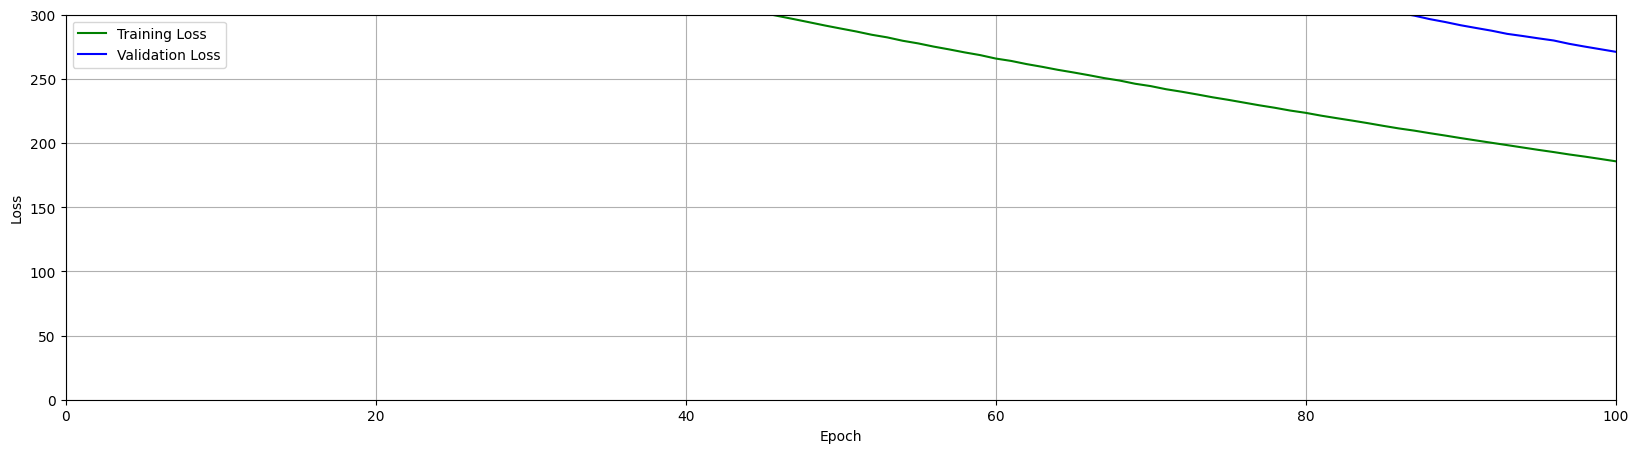

In [22]:
plot_loss(history)

In [23]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 87ms/step
Predicted price of a home with 3 rooms: $8.7K
Predicted price of a home with 4 rooms: $9.1K
Predicted price of a home with 5 rooms: $9.5K
Predicted price of a home with 6 rooms: $9.9K
Predicted price of a home with 7 rooms: $10.3K


C:\Users\jayas\AppData\Local\Temp\ipykernel_13884\3429684607.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")


In [16]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 109ms/step


In [13]:
def plot_data(x_data, y_data, x, y, title=None):
    
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

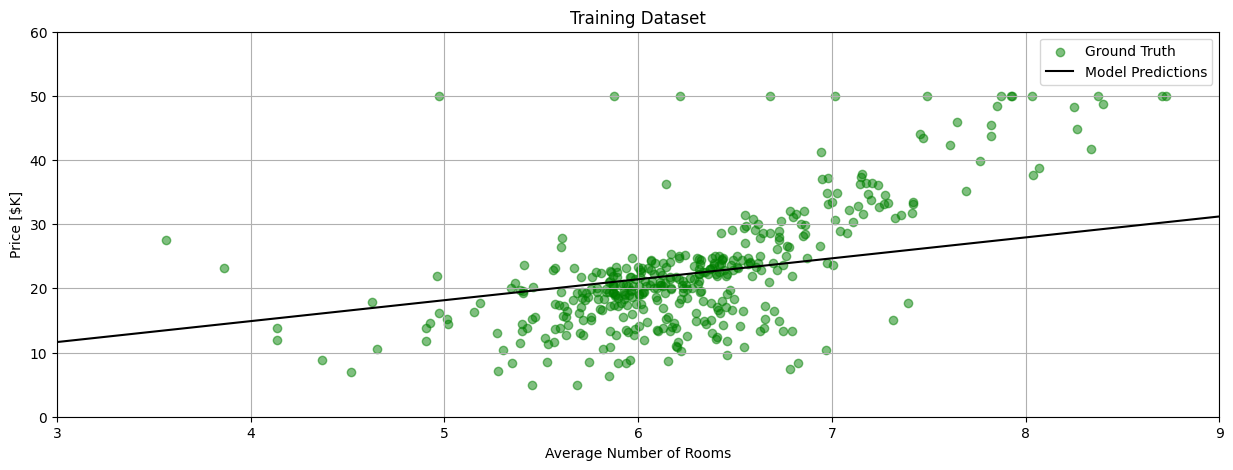

In [17]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

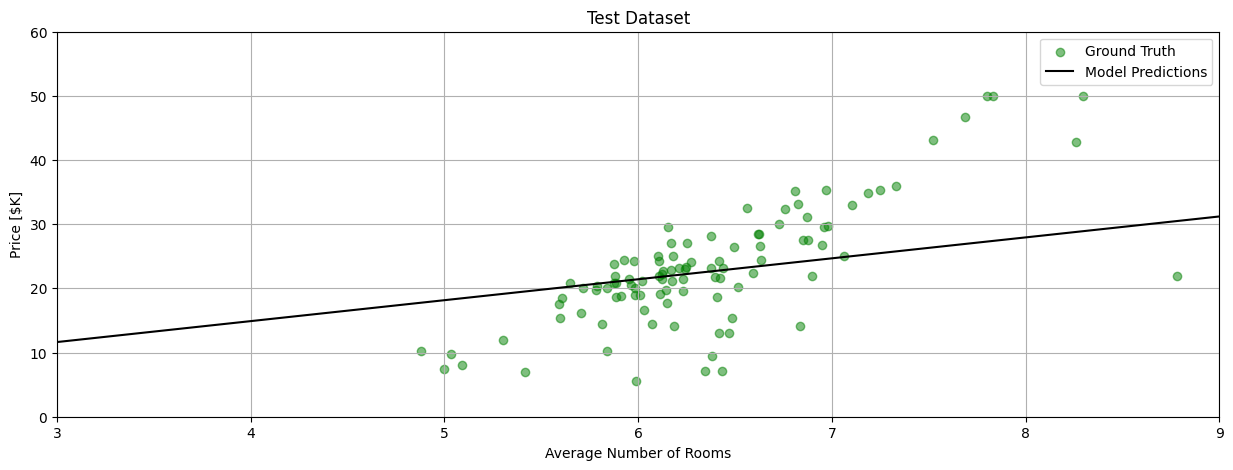

In [18]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')